In [304]:
FOLDER_ROOT = 'C:/Users/kjh97/prac/'
FOLDER_TRAIN = FOLDER_ROOT + 'trainset'
FOLDER_TEST = FOLDER_ROOT + 'testset'
sample = FOLDER_TRAIN+'/white_circle/Soxazone'

In [305]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import os
from PIL import Image
from imutils import paths
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [306]:
labels = os.listdir(FOLDER_TRAIN)
labels

['white_circle', 'white_ellipse', 'yellow_ellipse']

In [311]:
def imggen(folder):
    path_train1 = glob.glob(folder+'/white_circle/*.png')  # PIL 이미지
    path_train2 = glob.glob(folder+'/white_ellipse/*.png')
    path_train3 = glob.glob(folder+'/yellow_ellipse/*.png')
    for i in range(len(path_train1)):
        datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
        path_img1 = path_train1[i]
        image1 = Image.open(path_img1)
        arr = np.array(image1)
        x = img_to_array(arr)  # (3, 150, 150) 크기의 NumPy 배열
        x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열

# 아래 .flow() 함수는 임의 변환된 이미지를 배치 단위로 생성해서
# 지정된 `preview/` 폴더에 저장합니다.
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=folder+'/white_circle', save_prefix='white_circle', save_format='png'):
            i += 1
            if i > 10:
                break  # 이미지 20장을 생성하고 마칩니다
    for i in range(len(path_train2)):
        datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
        path_img2 = path_train2[i]
        image2 = Image.open(path_img2)
        arr = np.array(image2)
        x = img_to_array(arr)  # (3, 150, 150) 크기의 NumPy 배열
        x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열

# 아래 .flow() 함수는 임의 변환된 이미지를 배치 단위로 생성해서
# 지정된 `preview/` 폴더에 저장합니다.
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=folder+'/white_ellipse', save_prefix='white_ellipse', save_format='png'):
            i += 1
            if i > 30:
                break  # 이미지 20장을 생성하고 마칩니다
    for i in range(len(path_train3)):
        datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
        path_img3 = path_train3[i]
        image3 = Image.open(path_img3)
        arr = np.array(image3)
        x = img_to_array(arr)  # (3, 150, 150) 크기의 NumPy 배열
        x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열

# 아래 .flow() 함수는 임의 변환된 이미지를 배치 단위로 생성해서
# 지정된 `preview/` 폴더에 저장합니다.
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=folder+'/yellow_ellipse', save_prefix='yellow_ellipse', save_format='png'):
            i += 1
            if i > 30:
                break  # 이미지 20장을 생성하고 마칩니다

In [308]:
def parse_data(folder, labels):
    path_train1 = glob.glob(folder+'/white_circle/*.png')
    path_train2 = glob.glob(folder+'/white_ellipse/*.png')
    path_train3 = glob.glob(folder+'/yellow_ellipse/*.png')

    list_x=[]
    list_y=[]
    for i in range(len(path_train1)):
        
        path_img1 = path_train1[i]
        image1 = Image.open(path_img1)
        arr = np.array(image1)
        list_x.append(arr)
        
        start1 = path_img1.index('set/')
        end1 = path_img1.index('\\')
        label1 = path_img1[start1+4:end1]
        label_index1 = labels.index(label1)
        list_y.append(label_index1)
    for i in range(len(path_train2)):
        
        path_img2 = path_train2[i]
        image2 = Image.open(path_img2)
        arr = np.array(image2)
        list_x.append(arr)
        
        start2 = path_img2.index('set/')
        end2 = path_img2.index('\\')
        label2 = path_img2[start2+4:end2]
        label_index2 = labels.index(label2)
        list_y.append(label_index2)
    for i in range(len(path_train3)):
        
        path_img3 = path_train3[i]
        image3 = Image.open(path_img3)
        arr = np.array(image3)
        list_x.append(arr)
        
        start3 = path_img3.index('set/')
        end3 = path_img3.index('\\')
        label3 = path_img3[start3+4:end3]
        label_index3 = labels.index(label3)
        list_y.append(label_index3)
    return np.array(list_x), np.array(list_y)

In [309]:
test_x = imggen(FOLDER_TEST)

In [312]:
train_x = imggen(FOLDER_TRAIN)
train_x, train_y = parse_data(FOLDER_TRAIN, labels)
test_x, test_y = parse_data(FOLDER_TEST, labels)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((100, 426, 780, 4), (100,), (35, 426, 780, 4), (35,))

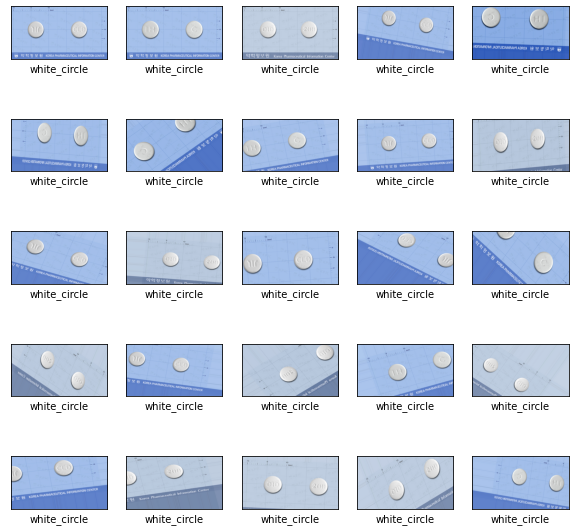

In [314]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_y[i]])
plt.show()

In [315]:
X = tf.keras.layers.Input(shape=[426, 780, 4])
H = tf.keras.layers.Conv2D(6, kernel_size = 5, activation = 'swish')(X)
print('H', H)
H = tf.keras.layers.MaxPool2D()(H)
print('H', H)
H = tf.keras.layers.Conv2D(16, kernel_size = 5, activation = 'swish')(H)
print('H', H)
H = tf.keras.layers.MaxPool2D()(H)
print('H', H)
H = tf.keras.layers.Flatten()(H)
print('H', H)
H = tf.keras.layers.Dense(120, activation = 'swish')(H)
print('H', H)
H = tf.keras.layers.Dense(84, activation = 'swish')(H)
print('H', H)
Y = tf.keras.layers.Dense(3, activation = 'softmax')(H)
print('Y', Y)
model = tf.keras.models.Model(X, Y)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

H Tensor("conv2d_22/IdentityN:0", shape=(None, 422, 776, 6), dtype=float32)
H Tensor("max_pooling2d_22/MaxPool:0", shape=(None, 211, 388, 6), dtype=float32)
H Tensor("conv2d_23/IdentityN:0", shape=(None, 207, 384, 16), dtype=float32)
H Tensor("max_pooling2d_23/MaxPool:0", shape=(None, 103, 192, 16), dtype=float32)
H Tensor("flatten_11/Reshape:0", shape=(None, 316416), dtype=float32)
H Tensor("dense_33/IdentityN:0", shape=(None, 120), dtype=float32)
H Tensor("dense_34/IdentityN:0", shape=(None, 84), dtype=float32)
Y Tensor("dense_35/Softmax:0", shape=(None, 3), dtype=float32)


In [355]:
model.fit(train_x, train_y, epochs =50)

Epoch 1/50
4/4 [==============================] - 18s 5s/step - loss: 0.6549 - accuracy: 0.9800
Epoch 2/50
4/4 [==============================] - 17s 4s/step - loss: 0.0811 - accuracy: 0.9700
Epoch 3/50
4/4 [==============================] - 18s 5s/step - loss: 0.3173 - accuracy: 0.9700
Epoch 4/50
4/4 [==============================] - 17s 4s/step - loss: 0.1233 - accuracy: 0.9800
Epoch 5/50
4/4 [==============================] - 19s 5s/step - loss: 2.6063e-05 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 18s 4s/step - loss: 0.2073 - accuracy: 0.9700
Epoch 7/50
4/4 [==============================] - 17s 4s/step - loss: 0.1081 - accuracy: 0.9900
Epoch 8/50
4/4 [==============================] - 17s 4s/step - loss: 7.9933e-06 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 17s 4s/step - loss: 1.0511e-05 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 17s 4s/step - loss: 1.4631e-05 - accuracy: 1.0000
Epoch 11/50
4/4 [======

In [356]:
test_loss, test_acc = model.evaluate(test_x, test_y, verbose =2)

2/2 - 0s - loss: 18.1561 - accuracy: 0.4286


In [357]:
predictions = model.predict(test_x)
predictions[0:5]

array([[9.9999976e-01, 2.6588657e-07, 1.1542767e-16],
       [1.0000000e+00, 1.6581978e-08, 7.7091302e-09],
       [1.0874482e-02, 1.6500119e-03, 9.8747545e-01],
       [1.0000000e+00, 4.8533288e-10, 2.2376361e-30],
       [1.0000000e+00, 4.3320535e-11, 9.7988320e-18]], dtype=float32)

In [358]:
np.argmax(predictions[0]), np.argmax(predictions[1]), np.argmax(predictions[2]), 
np.argmax(predictions[30]), np.argmax(predictions[4])

(0, 0)

In [359]:
test_y[11:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [360]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{}{:2.0f}% ({})'.format(labels[predicted_label],
                                   100*np.max(predictions_array),
                                   labels[true_label]),
                                   color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(3), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

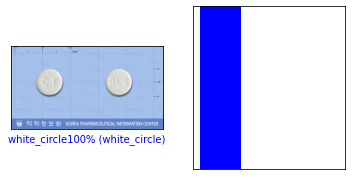

In [361]:
i =0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_y, test_x)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_y)
plt.show()

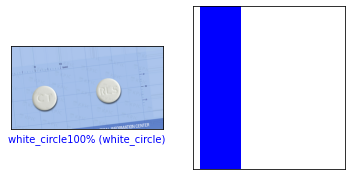

In [362]:
i =1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_y, test_x)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_y)
plt.show()

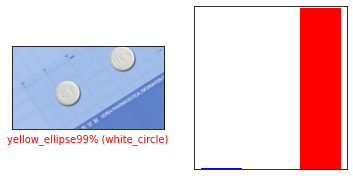

In [363]:
i =2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_y, test_x)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_y)
plt.show()

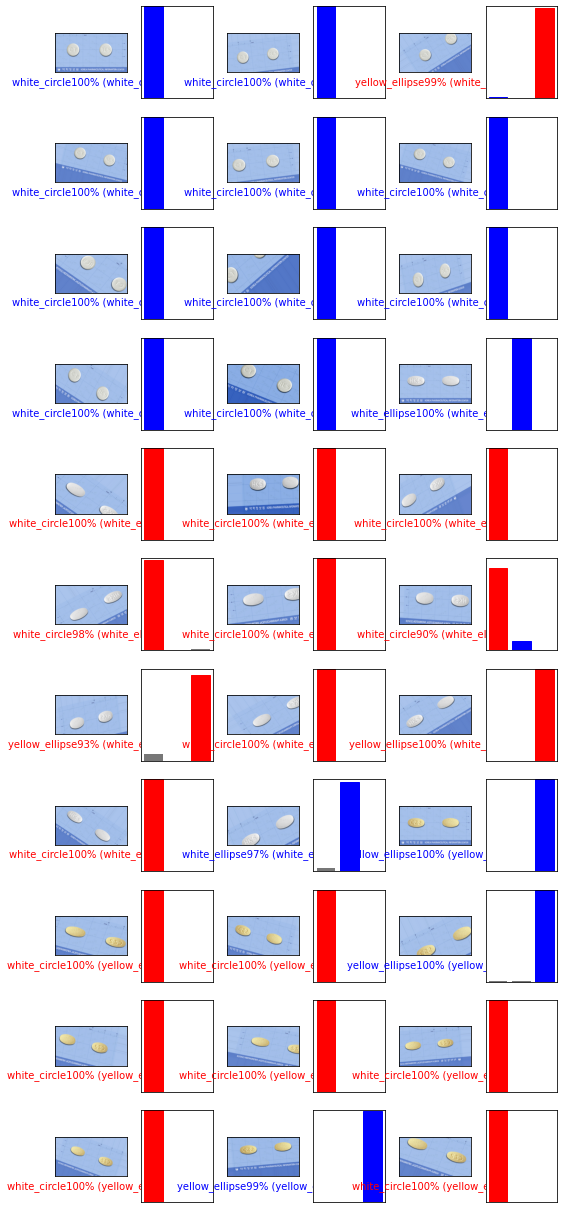

In [364]:
num_rows = 11
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*1*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_y, test_x)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_y)
plt.show()

In [365]:
i =
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_y, test_x)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_y)
plt.show()

SyntaxError: invalid syntax (<ipython-input-365-afec584e8bdb>, line 1)